# Running the analysis on results obtained from the survey

In [92]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# "Question"s json
questions = [
    {
      "case": 'camelcase',
      "numberOfWords": 2,
      "correctAnswer": 'ringAllBehavior',
      "question": 'ring all behavior',
      "answer1": 'ringAllBehavior',
      "answer2": 'ringAtTheBell',
      "answer3": 'ringAnyBarrier',
      "answer4": 'ringAnyBeach',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 2,
      "correctAnswer": 'qualityTime',
      "question": 'quality time',
      "answer1": 'qualityTake',
      "answer2": 'qualityTime',
      "answer3": 'qualifyToss',
      "answer4": 'quantifyTime',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 2,
      "correctAnswer": 'top-drawer',
      "question": 'top drawer',
      "answer1": 'top-depart',
      "answer2": 'tap-delete',
      "answer3": 'top-drawer',
      "answer4": 'trop-driver',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 2,
      "correctAnswer": 'flea-market',
      "question": 'flea market',
      "answer1": 'flea-market',
      "answer2": 'flee-merit',
      "answer3": 'flea-marked',
      "answer4": 'flew-market',
    },
    
    {
      "case": 'kebabcase',
      "numberOfWords": 3,
      "correctAnswer": 'hole-cut-bellow',
      "question": 'hole cut bellow',
      "answer1": 'hole-cat-bellow',
      "answer2": 'hole-cut-below',
      "answer3": 'hole-cut-bellow',
      "answer4": 'hall-cut-bellow',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 3,
      "correctAnswer": 'on-cloud-nine',
      "question": 'on cloud nine',
      "answer1": 'on-claud-nine',
      "answer2": 'on-cloud-nine',
      "answer3": 'om-cloud-nine',
      "answer4": 'on-clawed-nine',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 3,
      "correctAnswer": 'tugOfWar',
      "question": 'tug of war',
      "answer1": 'tugOffWar',
      "answer2": 'tegOfWar',
      "answer3": 'tugOfWor',
      "answer4": 'tugOfWar',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 3,
      "correctAnswer": 'ringAnyBells',
      "question": 'ring any bells',
      "answer1": 'ringAndBells',
      "answer2": 'ringAnyBells',
      "answer3": 'rightAnyBelts',
      "answer4": 'ringAnnyBells',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 4,
      "correctAnswer": 'back-to-square-one',
      "question": 'back to square one',
      "answer1": 'beck-to-square-one',
      "answer2": 'back-to-squire-one',
      "answer3": 'back-to-square-on',
      "answer4": 'back-to-square-one',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 4,
      "correctAnswer": 'my-cup-of-tea',
      "question": 'my cup of tea',
      "answer1": 'my-cup-of-tea',
      "answer2": 'mi-cup-of-tea',
      "answer3": 'my-cup-of-tee',
      "answer4": 'my-cvp-of-tea',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 4,
      "correctAnswer": 'shotInTheDark',
      "question": 'shot in the dark',
      "answer1": 'schotInTheDark',
      "answer2": 'shotInhTheDark',
      "answer3": 'ShoeInTheBark',
      "answer4": 'shotInTheDark',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 4,
      "correctAnswer": 'closeButNoCigar',
      "question": 'close but no cigar',
      "answer1": 'closeBytNoCigar',
      "answer2": 'closeButNoCigar',
      "answer3": 'closeBulNoCigar',
      "answer4": 'clsoseButNoCigar',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 5,
      "correctAnswer": 'short-end-of-the-stick',
      "question": 'short end of the stick',
      "answer1": 'short-end-of-the-stick',
      "answer2": 'shored-end-of-the-stick',
      "answer3": 'short-end-of-the-steck',
      "answer4": 'short-end-off-the-stick',
    },
    {
      "case": 'kebabcase',
      "numberOfWords": 5,
      "correctAnswer": 'two-down-one-to-go',
      "question": 'two down one to go',
      "answer1": 'two-doxn-one-to-go',
      "answer2": 'too-down-one-to-go',
      "answer3": 'two-down-one-to-ho',
      "answer4": 'two-down-one-to-go',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 5,
      "correctAnswer": 'swingingForTheFences',
      "question": 'swinging for the fences',
      "answer1": 'swingingForTheFences',
      "answer2": 'swingeingForTheFences',
      "answer3": 'swingingForTheFancies',
      "answer4": 'swillingForTheFences',
    },
    {
      "case": 'camelcase',
      "numberOfWords": 5,
      "correctAnswer": 'backToTheDrawingBoard',
      "question": 'back to the drawing board',
      "answer1": 'backToTheDrywingBoard',
      "answer2": 'backToTheDrawingBoard',
      "answer3": 'backToTheDrawingBored',
      "answer4": 'backToTheDrawingBord',
    },
  ]

In [94]:
cases = [q["case"] for q in questions]

In [95]:
# load json file
with open('answers.json') as f:
    data = json.load(f)
answers = data["plays"]

In [96]:
for a in answers:
    _user = answers[a]["user"]
    _answers = answers[a]["answers"]
    _time = answers[a]["time"]
    _feedback = answers[a]["feedback"]

In [97]:
time_till_correct = []
for a in answers:
    _time = answers[a]["time"]
    this_kebabs = []
    this_camel = []
    for i, t in enumerate(_time):
        if cases[i] == 'kebabcase':
            this_kebabs.append(_time[t][-1])
        else:
            this_camel.append(_time[t][-1])
    time_till_correct.append([np.mean(this_kebabs), np.mean(this_camel)])

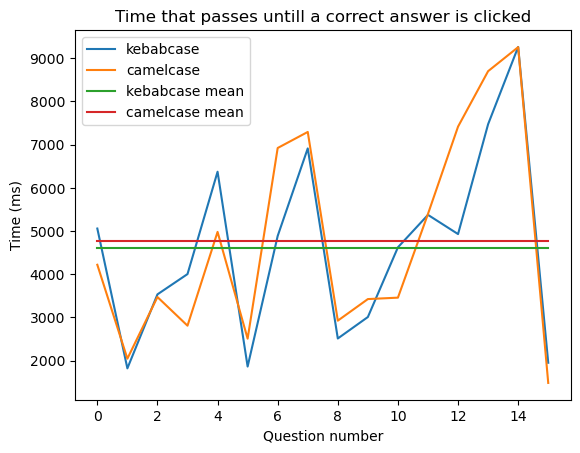

Kebabcase mean:  4598.4453125
Camelcase mean:  4768.953125


In [98]:
# Plot lines time till correct
plt.plot([t[0] for t in time_till_correct], label='kebabcase')
plt.plot([t[1] for t in time_till_correct], label='camelcase')
# Plot averages of both lines
kebabcase_mean = [np.mean([t[0] for t in time_till_correct]) for t in time_till_correct]
camelcase_mean = [np.mean([t[1] for t in time_till_correct]) for t in time_till_correct]
plt.plot(kebabcase_mean, label='kebabcase mean')
plt.plot(camelcase_mean, label='camelcase mean')
plt.xlabel('Question number')
plt.ylabel('Time (ms)')
plt.title('Time that passes untill a correct answer is clicked')
plt.legend()
plt.show()
print('Kebabcase mean: ', np.mean(kebabcase_mean))
print('Camelcase mean: ', np.mean(camelcase_mean))

In [99]:
time_till_click = []
for a in answers:
    _time = answers[a]["time"]
    this_kebabs = []
    this_camel = []
    for i, t in enumerate(_time):
        if cases[i] == 'kebabcase':
            this_kebabs.append(_time[t][0])
        else:
            this_camel.append(_time[t][0])
    time_till_click.append([np.mean(this_kebabs), np.mean(this_camel)])

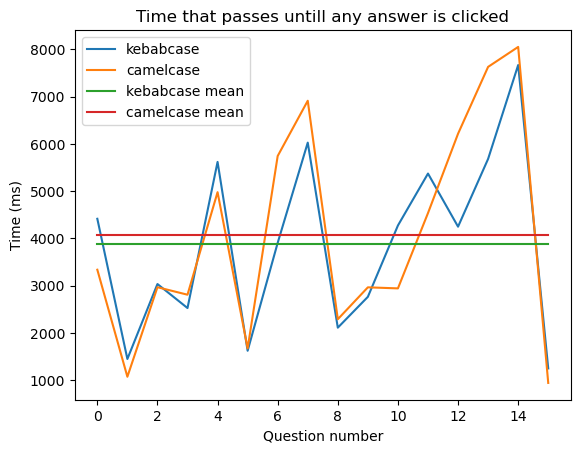

Kebabcase mean:  3873.5078125
Camelcase mean:  4067.0390625


In [100]:
plt.plot([t[0] for t in time_till_click], label='kebabcase')
plt.plot([t[1] for t in time_till_click], label='camelcase')
# Plot averages of both lines
kebabcase_mean = [np.mean([t[0] for t in time_till_click]) for i in range(len(time_till_click))]
camelcase_mean = [np.mean([t[1] for t in time_till_click]) for i in range(len(time_till_click))]
plt.plot(kebabcase_mean, label='kebabcase mean')
plt.plot(camelcase_mean, label='camelcase mean')
plt.xlabel('Question number')
plt.ylabel('Time (ms)')
plt.title('Time that passes untill any answer is clicked')
plt.legend()
plt.show()
print('Kebabcase mean: ', np.mean(kebabcase_mean))
print('Camelcase mean: ', np.mean(camelcase_mean))

In [101]:
number_of_wrong_clicks = []
for a in answers:
    _time = answers[a]["time"]
    this_kebabs = []
    this_camel = []
    for i, t in enumerate(_time):
        if cases[i] == 'kebabcase':
            _time[t] = _time[t][:-1]
            this_kebabs.append(len(_time[t]))
        else:
            _time[t] = _time[t][:-1]
            this_camel.append(len(_time[t]))
    number_of_wrong_clicks.append([np.mean(this_kebabs), np.mean(this_camel)])

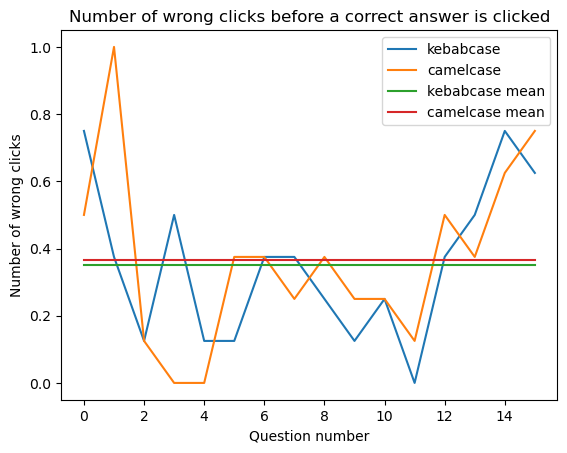

Kebabcase Mean:  0.3515625
Camelcase Mean:  0.3671875


In [102]:
# Plot lines number of wrong clicks
plt.plot([t[0] for t in number_of_wrong_clicks], label='kebabcase')
plt.plot([t[1] for t in number_of_wrong_clicks], label='camelcase')
# Plot averages of both lines
kebabcase_mean = [np.mean([t[0] for t in number_of_wrong_clicks]) for t in number_of_wrong_clicks]
camelcase_mean = [np.mean([t[1] for t in number_of_wrong_clicks]) for t in number_of_wrong_clicks]
plt.plot(kebabcase_mean, label='kebabcase mean')
plt.plot(camelcase_mean, label='camelcase mean')
plt.xlabel('Question number')
plt.ylabel('Number of wrong clicks')
plt.title('Number of wrong clicks before a correct answer is clicked')
plt.legend()
plt.show()
print("Kebabcase Mean: ", np.mean(kebabcase_mean))
print("Camelcase Mean: ", np.mean(camelcase_mean))